In [ ]:
pip install opendatasets 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly as px
import seaborn as sns
import matplotlib 
import os
%matplotlib inline


sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] =(12,6)


We'll download the dataset from kaggle using oprndatasets library

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kachalisarma20
Your Kaggle Key: ··········


100%|██████████| 3.83M/3.83M [00:00<00:00, 173MB/s]

The dataset is downloaded and extracted to the folder `weather-dataset-rattle-package`.

In [ ]:
os.listdir('weather-dataset-rattle-package')

['weatherAUS.csv']

Let's load the data into pandas dataframe

In [ ]:
weather_df = pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')

In [ ]:
weather_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


we will check the column types of the dataset

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are  missing values in `RainTomorrow` column ,which will be using for prediction of rain .

So, we will drop the raw having missing values in `RainTomorrow` columns.

In [ ]:
weather_df.dropna(subset=['RainTomorrow'] , inplace= True)

##Preparing Dataset for Training

### Training Validation and Testset

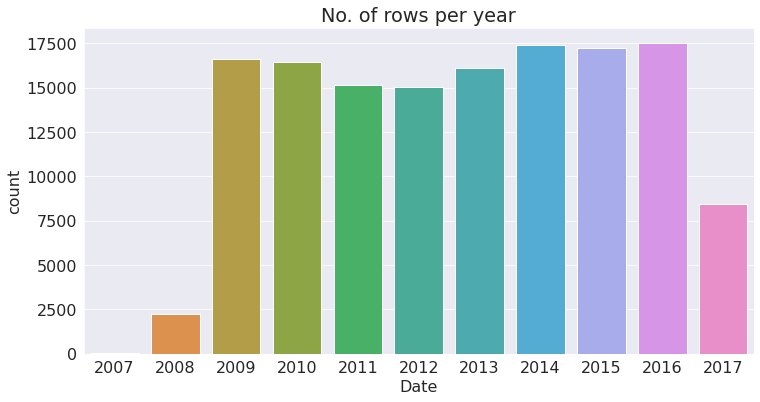

In [ ]:
plt.title('No. of rows per year')
sns.countplot(x=pd.to_datetime(weather_df.Date).dt.year)

we will separate trainig ,validation and teat dataset on the basis of time .

In [ ]:
year = pd.to_datetime(weather_df.Date).dt.year

In [ ]:
train_df = weather_df[year < 2015]
val_df = weather_df[year == 2015]
test_df = weather_df[year > 2015]

## Input and Target columns

In [ ]:
input_cols = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [ ]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [ ]:
numeric_col = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_col = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
print(numeric_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [ ]:
print(categorical_col)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


## Imputation of missing  numerical values

In [ ]:
!pip install scikit-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy= 'mean').fit(weather_df[numeric_col])

In [ ]:
train_inputs[numeric_col] = imputer.transform(train_inputs[numeric_col])
val_inputs[numeric_col] = imputer.transform(val_inputs[numeric_col])
test_inputs[numeric_col] = imputer.transform(test_inputs[numeric_col])

In [ ]:
test_inputs[numeric_col].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling Numeric Features


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(weather_df[numeric_col])

In [ ]:
train_inputs[numeric_col] = scaler.transform(train_inputs[numeric_col])
val_inputs[numeric_col] = scaler.transform(val_inputs[numeric_col])
test_inputs[numeric_col] = scaler.transform(test_inputs[numeric_col])

In [ ]:
val_inputs.describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.007075,0.030246,0.000000,0.000000,0.0,0.007752,0.000000,0.000000,0.04,0.0,0.125620,0.0816,0.000000,0.000000,0.021097,0.026871
max,0.952830,0.948960,0.666307,0.485517,1.0,1.000000,0.669231,0.850575,1.00,1.0,0.971901,0.9632,0.888889,0.888889,0.943038,0.925144


## Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False,handle_unknown='ignore').fit(weather_df[categorical_col].fillna('Unknown'))

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_col))

train_inputs[encoded_cols] = encoder.transform((train_inputs[categorical_col]).fillna('Unknown'))
val_inputs[encoded_cols] = encoder.transform((val_inputs[categorical_col]).fillna('Unknown'))
test_inputs[encoded_cols] = encoder.transform((test_inputs[categorical_col]).fillna('Unknown'))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [ ]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Unknown,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037723,0.525852,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037723,0.525852,SSE,0.341085,SSE,SE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037723,0.525852,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037723,0.525852,SSE,0.255814,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037723,0.525852,ENE,0.193798,SE,SSE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037723,0.525852,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037723,0.525852,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037723,0.525852,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037723,0.525852,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
X_train = train_inputs[numeric_col+encoded_cols ]
X_val = val_inputs[numeric_col+encoded_cols]
X_test = test_inputs[numeric_col+encoded_cols]

##Training the Logistic Regression Model

To train a logistic regression model, we can use the `LogisticRegression` class from `scikit-learn.liner_model` 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(solver = 'liblinear' , random_state= 42)

In [ ]:
%%time
logreg.fit(X_train , train_targets)

CPU times: user 2.4 s, sys: 41.3 ms, total: 2.44 s
Wall time: 2.43 s


LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
#We will now evalute decision tree using accuracy score on Train dataset
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report,plot_confusion_matrix
y_pred_train = logreg.predict(X_train)

print(accuracy_score(train_targets , y_pred_train ))
print(classification_report(train_targets,y_pred_train))
print(confusion_matrix(train_targets,y_pred_train))

0.8499009981007799
              precision    recall  f1-score   support

          No       0.87      0.94      0.91     76705
         Yes       0.73      0.52      0.61     22283

    accuracy                           0.85     98988
   macro avg       0.80      0.73      0.76     98988
weighted avg       0.84      0.85      0.84     98988

[[72467  4238]
 [10620 11663]]


In [ ]:
#We will now evalute decision tree using accuracy score Test dataset
y_pred_test = logreg.predict(X_test)

print(accuracy_score(test_targets , y_pred_test ))
print(classification_report(test_targets,y_pred_test))
print(confusion_matrix(test_targets,y_pred_test))


0.8404558404558404
              precision    recall  f1-score   support

          No       0.86      0.95      0.90     20028
         Yes       0.73      0.49      0.58      5946

    accuracy                           0.84     25974
   macro avg       0.79      0.72      0.74     25974
weighted avg       0.83      0.84      0.83     25974

[[18946  1082]
 [ 3062  2884]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


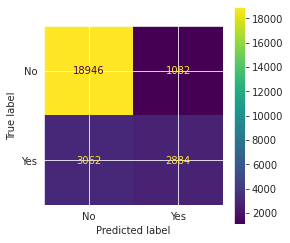

In [ ]:

plt.rcParams["figure.figsize"] = (4, 4)
plt.rcParams.update({'font.size': 10})

plot_confusion_matrix(logreg,X_test,test_targets);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


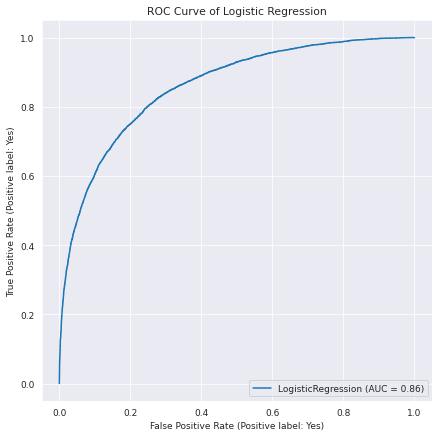

In [ ]:
from sklearn import metrics
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({'font.size': 9})

metrics.plot_roc_curve(logreg,X_test,test_targets)
plt.title("ROC Curve of Logistic Regression");



From the above evalution we can clearly see the the training dataset  acsuracy is around 85% and test dataset accuracy is 84% .

##Training and visualization decision tree

A decision tree in general represents hierarchical series of binary decisions.


### Training 

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decTree = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
decTree.fit(X_train , train_targets)

CPU times: user 3.37 s, sys: 0 ns, total: 3.37 s
Wall time: 3.34 s


DecisionTreeClassifier(random_state=42)

###Evalution

We will now evalute decision tree using accuracy score 

In [ ]:
y_pred_train1 = decTree.predict(X_train)

In [ ]:
y_pred_train1

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
pd.value_counts(y_pred_train1)

No     76707
Yes    22281
dtype: int64

Now let's have look on accuracy of the predictions.

In [ ]:
y_pred_train1 = decTree.predict(X_train)

print(accuracy_score(train_targets , y_pred_train1 ))
print(classification_report(train_targets,y_pred_train1))
print(confusion_matrix(train_targets,y_pred_train1))

0.9999797955307714
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     76705
         Yes       1.00      1.00      1.00     22283

    accuracy                           1.00     98988
   macro avg       1.00      1.00      1.00     98988
weighted avg       1.00      1.00      1.00     98988

[[76705     0]
 [    2 22281]]


The training set accuracy is approximately 100% . But , we can't rely only on training set accuracy . So , now we will see the accuracy of Test set

In [ ]:
y_pred_test1 = decTree.predict(X_test)

print(accuracy_score(test_targets , y_pred_test1 ))
print(classification_report(test_targets,y_pred_test1))
print(confusion_matrix(test_targets,y_pred_test1))

0.7772772772772772
              precision    recall  f1-score   support

          No       0.86      0.85      0.85     20028
         Yes       0.51      0.53      0.52      5946

    accuracy                           0.78     25974
   macro avg       0.69      0.69      0.69     25974
weighted avg       0.78      0.78      0.78     25974

[[17032  2996]
 [ 2789  3157]]


So , Although the training set has a accuracy of about 100% but accuracy of test set is only 77%.

As , it can be seen that the model ia performing well with training set , that implies the model has learned training example perfect but , doesn't generalize the previously unseen example .
  This phenomanon is overfitting .  

### Visulization

We can visualize the decision tree learned from the training.

In [ ]:
from sklearn.tree import plot_tree , export_text

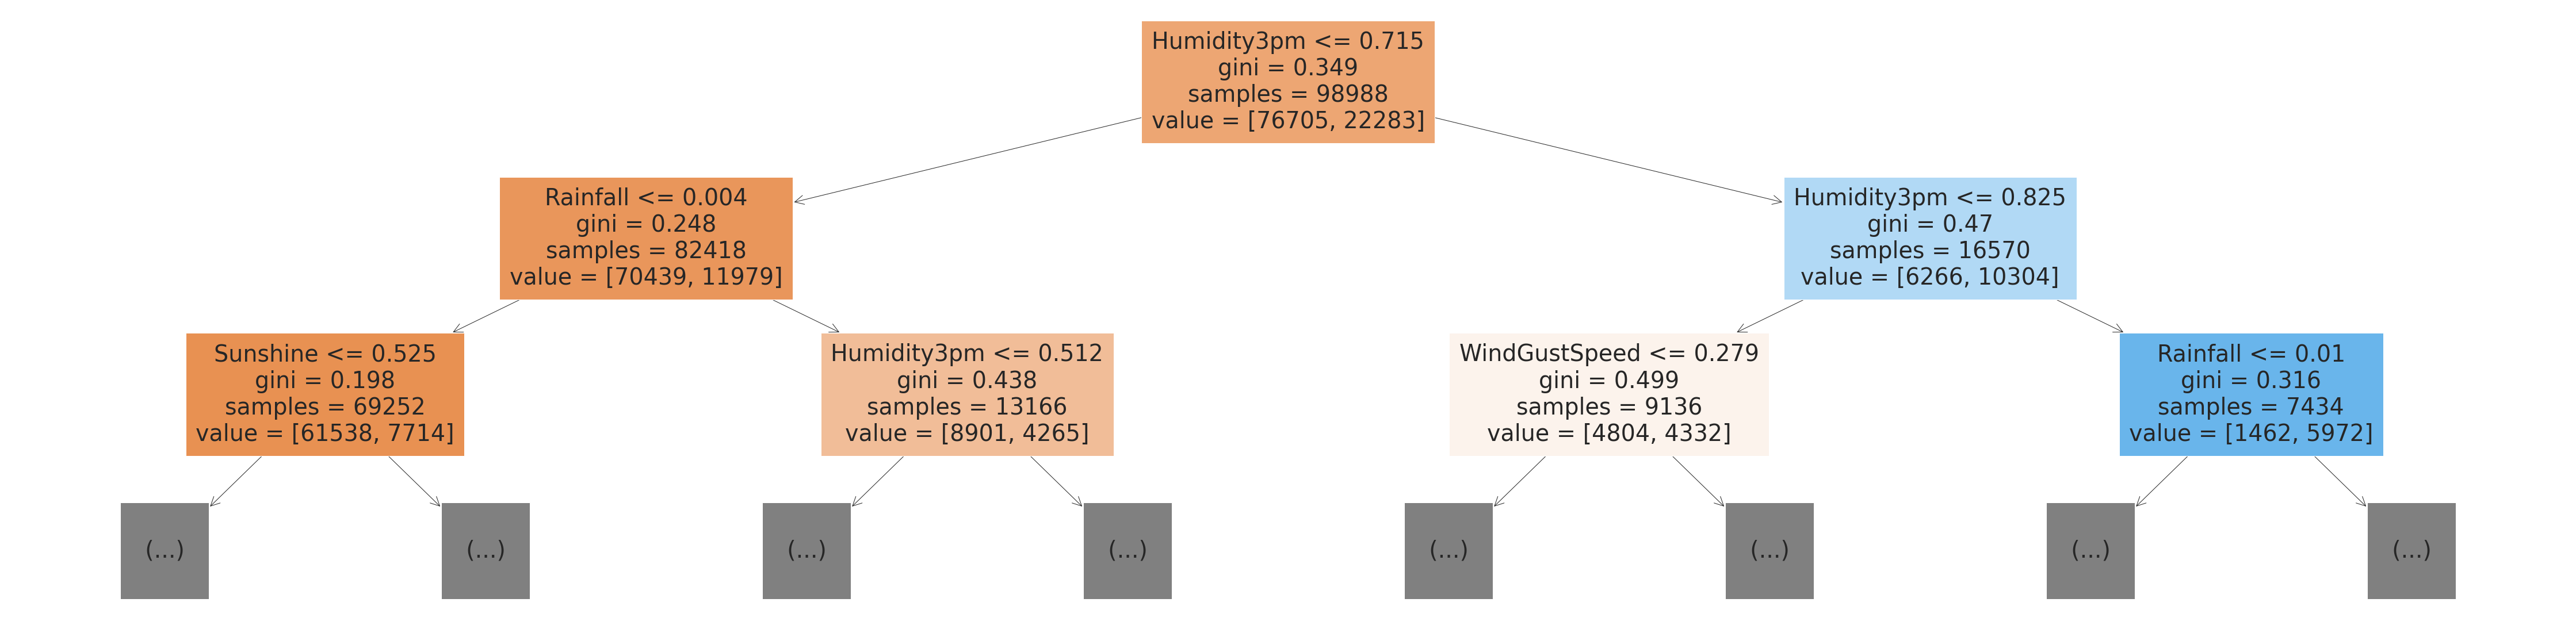

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(decTree, feature_names=X_train.columns, max_depth=2, filled=True);

Let's check the depth of the tree that is created

In [ ]:
decTree.tree_.max_depth

48

In [ ]:
#Let's have a look into Feature Importance
decTree.feature_importances_


array([3.43949832e-02, 3.20723744e-02, 5.96978427e-02, 2.39997157e-02,
       4.96970278e-02, 5.52776844e-02, 2.77290154e-02, 2.87896517e-02,
       3.97762378e-02, 2.61665505e-01, 3.38797443e-02, 6.29086081e-02,
       1.41634157e-02, 1.82574107e-02, 3.39304134e-02, 2.99978180e-02,
       2.29983521e-03, 1.97127428e-03, 1.30448300e-03, 7.05458133e-04,
       1.51355792e-03, 1.12862805e-03, 8.66864394e-04, 1.77451768e-03,
       1.21677026e-03, 1.57331930e-03, 8.42954495e-04, 2.05031388e-03,
       1.90637772e-03, 3.26731137e-04, 1.11629763e-03, 1.52431517e-03,
       5.08479231e-04, 8.30004101e-04, 1.48248394e-03, 8.87667861e-04,
       7.61612213e-04, 7.02994607e-04, 1.72668316e-03, 2.07806756e-03,
       3.80229195e-04, 7.64016199e-04, 1.38715756e-03, 1.47491895e-03,
       1.48825382e-03, 8.67028594e-04, 8.33784178e-04, 1.54580309e-03,
       1.09367536e-03, 2.03218887e-03, 8.51581460e-04, 1.79979059e-03,
       9.69639078e-04, 1.28254100e-03, 1.28721925e-03, 3.77018000e-04,
      

In [ ]:
#In this step I will turn the above array into a dataframe and visualize important features.
importance_df = pd.DataFrame({
    'feature' : X_train.columns,
    'importance': decTree.feature_importances_
}).sort_values('importance',ascending =False )


importance_df.head(10)

,feature,importance
9,Humidity3pm,0.261666
11,Pressure3pm,0.062909
2,Rainfall,0.059698
5,WindGustSpeed,0.055278
4,Sunshine,0.049697
8,Humidity9am,0.039776
0,MinTemp,0.034395
14,Temp9am,0.033930
10,Pressure9am,0.033880
1,MaxTemp,0.032072


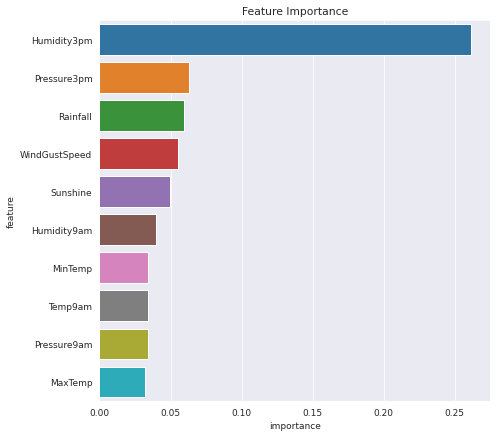

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Overfitting

As we saw that our decision tree classifier model memorized all training examples , leading to almost 100% training accuracy . While validation accuracy is only about 77%.This is overfitting and now we will look for reducing the overfitting which is called  `regularization`.

We will look at a couple of the hyperparameters of `DecisionTreeClassifier` ,by the modification of those we can reduce the overfitting.

Hyperparameters , we will be looking here are :


*   `max_depth`
*   `max_leaf_nodes`





###Max_Depth

By reducing the maximum depth of the Decision tree , we can prevent the tree from memorizing all training examples , which may lead to better generalization.

In [ ]:
def max_depth_error(md):
  decTree = DecisionTreeClassifier(max_depth=md , random_state= 42 )
  decTree.fit(X_train , train_targets)
  train_acc = 1- decTree.score(X_train , train_targets)
  test_acc = 1- decTree.score(X_test , test_targets)
  return {'Max Depth' : md , 'Training Error' : train_acc ,'Test Error' : test_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1 , 25)])

CPU times: user 57.3 s, sys: 1.93 ms, total: 57.3 s
Wall time: 58.1 s


In [ ]:
errors_df

,Max Depth,Training Error,Test Error
0,1,0.184315,0.191538
1,2,0.179547,0.184107
2,3,0.170869,0.176407
3,4,0.165707,0.176754
4,5,0.160676,0.171441
5,6,0.156271,0.169670
6,7,0.153312,0.168900
7,8,0.147806,0.166282
8,9,0.140916,0.167244
9,10,0.132966,0.170209


In [ ]:
decTree = DecisionTreeClassifier(max_depth = 8 , random_state = 42)
decTree.fit(X_train, train_targets)
decTree.score(X_test , test_targets)

0.8337183337183337

Clearly , we can see that model is performing better now with test dataset .

###Max_leaf_nodes

Another way here, to control the size of complexity of a decision tree is to limit the number of leaf nodes.

In [ ]:
decTree = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
decTree.fit(X_train , train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [ ]:
decTree.score(X_train, train_targets)

0.8480421869317493

In [ ]:
decTree.score(X_test, test_targets)

0.8321398321398321

In [ ]:
decTree.tree_.max_depth

12

Let's modify both the hyperparameter together to obtain better result.

In [ ]:
decTree = DecisionTreeClassifier(max_depth = 8 ,max_leaf_nodes=142, random_state=42)
decTree.fit(X_train , train_targets)
decTree.score(X_test, test_targets)

0.8341803341803342

In [ ]:
y_pred_test1 = decTree.predict(X_test)

print(accuracy_score(test_targets , y_pred_test1 ))
print(classification_report(test_targets,y_pred_test1))
print(confusion_matrix(test_targets,y_pred_test1))

0.8341803341803342
              precision    recall  f1-score   support

          No       0.85      0.95      0.90     20028
         Yes       0.72      0.45      0.55      5946

    accuracy                           0.83     25974
   macro avg       0.79      0.70      0.73     25974
weighted avg       0.82      0.83      0.82     25974

[[18985  1043]
 [ 3264  2682]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


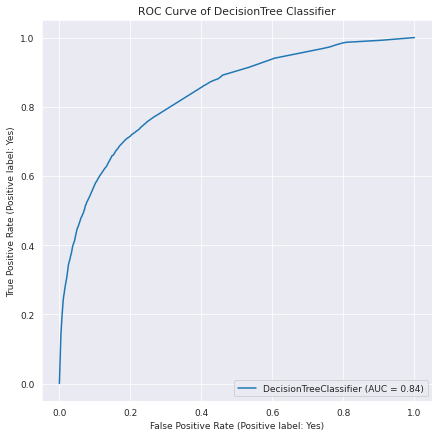

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({'font.size': 9})

metrics.plot_roc_curve(decTree,X_test,test_targets)
plt.title("ROC Curve of DecisionTree Classifier");

##Training a Random Forest

We can use `RandomForestClassifier` from `sklearn.ensemble` to train a RandomForest model.

We will perform 


*   train the model
*   evalution


*   hyperparameters tuning
*   regularize the overfitting





In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier( random_state=42)

In [ ]:
%%time
rf.fit(X_train, train_targets)

CPU times: user 29 s, sys: 116 ms, total: 29.1 s
Wall time: 29.8 s


RandomForestClassifier(random_state=42)

###Evalution

We will now evalute decision tree using accuracy score

In [ ]:
y_pred_train2 = rf.predict(X_train)

print(accuracy_score(train_targets , y_pred_train2 ))
print(classification_report(train_targets,y_pred_train2))
print(confusion_matrix(train_targets,y_pred_train2))

0.9999595910615429
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     76705
         Yes       1.00      1.00      1.00     22283

    accuracy                           1.00     98988
   macro avg       1.00      1.00      1.00     98988
weighted avg       1.00      1.00      1.00     98988

[[76705     0]
 [    4 22279]]


In [ ]:
y_pred_test2 = rf.predict(X_test)

print(accuracy_score(test_targets , y_pred_test2 ))
print(classification_report(test_targets,y_pred_test2))
print(confusion_matrix(test_targets,y_pred_test2))

0.8455763455763455
              precision    recall  f1-score   support

          No       0.86      0.95      0.91     20028
         Yes       0.76      0.48      0.59      5946

    accuracy                           0.85     25974
   macro avg       0.81      0.72      0.75     25974
weighted avg       0.84      0.85      0.83     25974

[[19123   905]
 [ 3106  2840]]


Training score is around 100% whereas test score is 84%.

###Hyperparameter tuning and regularization

In [ ]:
rf.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
rf = RandomForestClassifier( n_jobs=-1,random_state=42, 
                               n_estimators=500,
                               max_features=7,
                               max_depth=40, 
                               )

In [ ]:
rf.fit(X_train, train_targets)

RandomForestClassifier(max_depth=40, max_features=7, n_estimators=500,
                       n_jobs=-1, random_state=42)

In [ ]:
y_pred_test2 = rf.predict(X_test)

print(accuracy_score(test_targets , y_pred_test2 ))
print(classification_report(test_targets,y_pred_test2))
print(confusion_matrix(test_targets,y_pred_test2))

0.8455378455378455
              precision    recall  f1-score   support

          No       0.86      0.96      0.91     20028
         Yes       0.77      0.47      0.58      5946

    accuracy                           0.85     25974
   macro avg       0.81      0.71      0.74     25974
weighted avg       0.84      0.85      0.83     25974

[[19171   857]
 [ 3155  2791]]


##Training a CatBoost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 109 kB/s 


##Training of CatBoost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(iterations=2000, eval_metric = "AUC")
cat.fit(X_train, train_targets)

Learning rate set to 0.038815
0:	total: 87.1ms	remaining: 2m 54s
1:	total: 119ms	remaining: 1m 59s
2:	total: 148ms	remaining: 1m 38s
3:	total: 178ms	remaining: 1m 29s
4:	total: 206ms	remaining: 1m 22s
5:	total: 232ms	remaining: 1m 17s
6:	total: 260ms	remaining: 1m 14s
7:	total: 289ms	remaining: 1m 11s
8:	total: 317ms	remaining: 1m 10s
9:	total: 361ms	remaining: 1m 11s
10:	total: 396ms	remaining: 1m 11s
11:	total: 423ms	remaining: 1m 10s
12:	total: 450ms	remaining: 1m 8s
13:	total: 479ms	remaining: 1m 7s
14:	total: 507ms	remaining: 1m 7s
15:	total: 535ms	remaining: 1m 6s
16:	total: 564ms	remaining: 1m 5s
17:	total: 597ms	remaining: 1m 5s
18:	total: 626ms	remaining: 1m 5s
19:	total: 654ms	remaining: 1m 4s
20:	total: 682ms	remaining: 1m 4s
21:	total: 713ms	remaining: 1m 4s
22:	total: 741ms	remaining: 1m 3s
23:	total: 770ms	remaining: 1m 3s
24:	total: 811ms	remaining: 1m 4s
25:	total: 850ms	remaining: 1m 4s
26:	total: 881ms	remaining: 1m 4s
27:	total: 912ms	remaining: 1m 4s
28:	total: 940m

In [ ]:
y_pred_test3 = cat.predict(X_test)

print(accuracy_score(test_targets , y_pred_test3 ))
print(classification_report(test_targets,y_pred_test3))
print(confusion_matrix(test_targets,y_pred_test3))

0.8563178563178563
              precision    recall  f1-score   support

          No       0.88      0.95      0.91     20028
         Yes       0.76      0.55      0.64      5946

    accuracy                           0.86     25974
   macro avg       0.82      0.75      0.77     25974
weighted avg       0.85      0.86      0.85     25974

[[18989  1039]
 [ 2693  3253]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


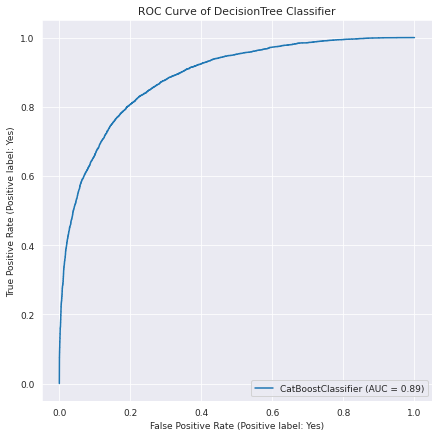

In [ ]:
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams.update({'font.size': 9})

metrics.plot_roc_curve(cat,X_test,test_targets)
plt.title("ROC Curve of DecisionTree Classifier");

In [ ]:
import pickle

In [ ]:
pickle.dump(cat ,open('cat.pkl','wb'))

Among all the models , we can see catBoost model has high accuracy prediction .So , we will use catBoost model for our predict.